In [1]:
# importing libraries, setting up global variables such as the TransactionEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import ast
# Tool 1: Mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori, fpmax, fpgrowth

# Tool 2: Pyfpgrowth
import pyfpgrowth

# custom fp-tree implementation
from fptree import Tree

# utility function to print frequent itemsets from dictionary representation
# both pyfpgrowth and custom implementation return the frequent itemsets in this form
def print_freq_itemsets(freq_itemsets, num_transactions):    
    for itemset, sup_count in freq_itemsets.items():
        str = "{"
        for item in itemset:
            str += f"{item}, "
        str = str[:-2]
        str += "}"
        print(f'{str} | sup_count: {sup_count} | support: {sup_count/num_transactions:.3f}')

te = TransactionEncoder()

In [2]:
# datasets to be used throughout notebook
# sample dataset from lectures
dataset_lec = [
    ["I1", "I2", "I5"],
    ["I2", "I4"],
    ["I2", "I3"],
    ["I1", "I2", "I4"],
    ["I1", "I3"],
    ["I2", "I3"],
    ["I1", "I3"],
    ["I1", "I2", "I3", "I5"],
    ["I1", "I2", "I3"],
]
te_ary = te.fit(dataset_lec).transform(dataset_lec)
df_lec = pd.DataFrame(te_ary, columns=te.columns_)
print(df_lec.head(10))
min_sup_count_lec = 2
min_sup_lec = min_sup_count_lec/len(dataset_lec)
min_conf_lec = 0.7

# dataset from mlxtend examples
dataset_6 = [
    ["Milk", "Onion", "Nutmeg", "Kidney Beans", "Eggs", "Yogurt"],
    ["Dill", "Onion", "Nutmeg", "Kidney Beans", "Eggs", "Yogurt"],
    ["Milk", "Apple", "Kidney Beans", "Eggs"],
    ["Milk", "Unicorn", "Corn", "Kidney Beans", "Yogurt"],
    ["Corn", "Onion", "Onion", "Kidney Beans", "Ice cream", "Eggs"],
]
te_ary = te.fit(dataset_6).transform(dataset_6)
df_6 = pd.DataFrame(te_ary, columns=te.columns_)
min_sup_6 = 0.5
min_sup_count_6 = math.ceil(min_sup_6 * len(dataset_6))
min_conf_6 = 0.7

# chosen dataset - ages
df = pd.read_csv("../cleaned_ages_dataset.csv")

      I1     I2     I3     I4     I5
0   True   True  False  False   True
1  False   True  False   True  False
2  False   True   True  False  False
3   True   True  False   True  False
4   True  False   True  False  False
5  False   True   True  False  False
6   True  False   True  False  False
7   True   True   True  False   True
8   True   True   True  False  False


# Algorithm Verification
For peace of mind, the custom fp-growth algorithm is tested and compared to the results of the two well-known library implementations. They are compared using two examples. The first is a dataset from the week 4 lecture. The other is a dataset from the mlxtend examples (https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)

In [3]:
# sample dataset from lectures - dataset_lec | df_lec | min_sup_lec | min_conf_lec
print('--- Sample Dataset from Lecture ---')
print(df_lec)
# mlxtend
mlxtend_frequent_itemsets = fpgrowth(df_lec, min_support=min_sup_lec, use_colnames=True)
mlxtend_association_rules_df = association_rules(mlxtend_frequent_itemsets, metric="confidence", min_threshold=min_conf_lec)

print("\nMlxtend Frequent Itemsets:")
print(mlxtend_frequent_itemsets)

print("\nMlxtend Association Rules:")
print(mlxtend_association_rules_df)

# pyfpgrowth
pyfpgrowth_frequent_itemsets = pyfpgrowth.find_frequent_patterns(transactions=dataset_lec, support_threshold=min_sup_count_lec)
pyfpgrowth_association_rules = pyfpgrowth.generate_association_rules(patterns=pyfpgrowth_frequent_itemsets, confidence_threshold=min_conf_lec)

print("\n\nPyfpgrowth Frequent Itemsets:")
print_freq_itemsets(pyfpgrowth_frequent_itemsets, len(dataset_lec))

print("\nPyfpgrowth Association Rules:")
for antecedent, consequent in pyfpgrowth_association_rules.items():
    print(f'{antecedent} -> {consequent}')

# custom fpgrowth algorithm
fp_tree = Tree(dataset_lec, min_sup=min_sup_lec)
cust_frequent_itemsets = fp_tree.generate_frequent_itemsets()
cust_association_rules = fp_tree.generate_rules(cust_frequent_itemsets, min_conf_lec)

print("\n\nCustom Generated Frequent Itemsets:")
print_freq_itemsets(cust_frequent_itemsets, len(dataset_lec))

print("\nCustom Generated Association Rules:")
print(f'{len(cust_association_rules)} total rules generated.')
for rule in cust_association_rules:
    print(rule)

    
# dataset from mlxtend examples - dataset_6 | df_6 | min_sup_6 | min_conf_6
print('\n\n--- Sample Dataset from Mlxtend examples ---')
print(df_6)
# mlxtend
mlxtend_frequent_itemsets = fpgrowth(df_6, min_support=min_sup_6, use_colnames=True)
mlxtend_association_rules_df = association_rules(mlxtend_frequent_itemsets, metric="confidence", min_threshold=min_conf_6)

print("\nMlxtend Frequent Itemsets:")
print(mlxtend_frequent_itemsets)

print("\nMlxtend Association Rules:")
print(mlxtend_association_rules_df)

# pyfpgrowth
pyfpgrowth_frequent_itemsets = pyfpgrowth.find_frequent_patterns(transactions=dataset_6, support_threshold=min_sup_count_6)
pyfpgrowth_association_rules = pyfpgrowth.generate_association_rules(patterns=pyfpgrowth_frequent_itemsets, confidence_threshold=min_conf_6)

print("\n\nPyfpgrowth Frequent Itemsets:")
print_freq_itemsets(pyfpgrowth_frequent_itemsets, len(dataset_6))

print("\nPyfpgrowth Association Rules:")
for antecedent, consequent in pyfpgrowth_association_rules.items():
    print(f'{antecedent} -> {consequent}')

# custom fpgrowth algorithm
fp_tree = Tree(dataset_lec, min_sup=min_sup_lec)
cust_frequent_itemsets = fp_tree.generate_frequent_itemsets()
cust_association_rules = fp_tree.generate_rules(cust_frequent_itemsets, min_conf_lec)

print("\n\nCustom Generated Frequent Itemsets:")
print_freq_itemsets(cust_frequent_itemsets, len(dataset_6))

print("\nCustom Generated Association Rules:")
print(f'{len(cust_association_rules)} total rules generated.')
for rule in cust_association_rules:
    print(rule)

--- Sample Dataset from Lecture ---
      I1     I2     I3     I4     I5
0   True   True  False  False   True
1  False   True  False   True  False
2  False   True   True  False  False
3   True   True  False   True  False
4   True  False   True  False  False
5  False   True   True  False  False
6   True  False   True  False  False
7   True   True   True  False   True
8   True   True   True  False  False

Mlxtend Frequent Itemsets:
     support      itemsets
0   0.777778          (I2)
1   0.666667          (I1)
2   0.222222          (I5)
3   0.222222          (I4)
4   0.666667          (I3)
5   0.444444      (I1, I2)
6   0.444444      (I1, I3)
7   0.222222  (I1, I2, I3)
8   0.222222      (I1, I5)
9   0.222222      (I2, I5)
10  0.222222  (I1, I2, I5)
11  0.222222      (I2, I4)
12  0.444444      (I2, I3)

Mlxtend Association Rules:
  antecedents consequents  antecedent support  consequent support   support   
0        (I5)        (I1)            0.222222            0.666667  0.222222  \
1 

# Preprocessing Ages Dataset for FP-Growth
Generating frequent itemsets requires transactional data. This means that our dataset must be split into singular occurrences of a collection of attributes. While a significant portion of the dataset is in this form, there are also many instances which are not, such as the 'Associated Countries' column which may include some datapoints such as `united kingdom; india`. In this scenario, we do not want to treat this unique combination of countries as a new country, but instead as a single instance of United Kingdom, and of India. To account for this, a new entry will be created for each unique associated country. So, a data point like this:
`ajoy mukhopadhyay,male,politician,1928,2019,,91,united kingdom; india,"[81.3, 69.4]",91-100`
may be split into two data points:\
`ajoy mukhopadhyay,male,politician,1928,2019,,91,united kingdom,81.3,91-100`\
and\
`ajoy mukhopadhyay,male,politician,1928,2019,,91,india,69.4,91-100`\
which represent the two combinations of United Kingdom (and its life expectancy) and India (and its life expectancy)

In [4]:
print(f"Total unique Associated Countries before splitting: {len(df['Associated Countries'].unique())}")
print(f"Total unique Genders before splitting: {len(df['Gender'].unique())}")
print(f"Total unique Occupations before splitting: {len(df['Occupation'].unique())}")
print(f"Total unique Manners of Death before splitting: {len(df['Manner of death'].unique())}")

# split dataframe by associated country/life expectancy
life_expectancies = {}
df_countries = []

for index, row in df.iterrows():
    countries = [country.strip() for country in row['Associated Countries'].split(';')]
    life_exp = row['Associated Country Life Expectancy']
    if not pd.isna(life_exp):
        life_exp = [float(item) for item in ast.literal_eval(row['Associated Country Life Expectancy'])]
    else:
        life_exp = False
    i = 0
    # iterate through all countries in the list
    for country in countries:
        # country doesnt already have a life expectancy recorded against it
        if country not in life_expectancies:
            # life expectancy wasnt 'nan'
            if life_exp:
                life_expectancies[country] = life_exp[i]
        # only want to add the row if there is an associated life expectancy with the country
        if country in life_expectancies:
            new_row = row.copy()
            new_row['Associated Countries'] = f"COUNTRY_{country}"
            new_row['Associated Country Life Expectancy'] = f"LIFE_EXP_{life_expectancies[country]}"
            i += 1
            df_countries.append(new_row)

# split dataframe by gender
df_genders = []
for row in df_countries:
    if pd.isna(row['Gender']):
        genders = ['Unknown_Gender']
    else:
        genders = [gender.strip() for gender in row['Gender'].split(';')]
    for gender in genders:
        new_row = row.copy()
        new_row['Gender'] = f"GENDER_{gender}"
        df_genders.append(new_row)

#split dataframe by occupation
df_occupations = []
for row in df_genders:
    if pd.isna(row['Occupation']):
        occupations = ['Unknown_Occupation']
    else:
        occupations = [occupation.strip() for occupation in row['Occupation'].split(';')]
    for occupation in occupations:
        new_row = row.copy()
        new_row['Occupation'] = f"OCCUPATION_{occupation}"
        df_occupations.append(new_row)

# split dataframe by manner of death
df_manner = []
for row in df_occupations:
    if pd.isna(row['Manner of death']):
        deaths = ['Unknown_Manner_of_Death']
    else:
        deaths = [death.strip() for death in row['Manner of death'].split(';')]
    for death in deaths:
        new_row = row.copy()
        new_row['Manner of death'] = f"MOD_{death}"
        df_manner.append(new_row)

# create a new df with the new rows
new_df = pd.DataFrame(df_manner)

# reset index
new_df.reset_index(drop=True, inplace=True)

# drop 'Name' column as we are not performing any analysis on it
new_df = new_df.drop('Name', axis=1)

# convert birth year column to include prefix
new_df['Birth year'] = new_df['Birth year'].apply(lambda year: f'BIRTH_{year}')

# convert death year column to include prefix
new_df['Death year'] = new_df['Death year'].apply(lambda year: f'DEATH_{year}')

# convert age of death column to include prefix
new_df['Age of death'] = new_df['Age of death'].apply(lambda age: f'AOD_{age}')

# convert AOD category column to include prefix
new_df['AOD_Category'] = new_df['AOD_Category'].apply(lambda age_cat: f'AOD_CAT_{age_cat}')

print(f"Total unique Associated Countries after splitting: {len(new_df['Associated Countries'].unique())}")
print(f"Total unique Genders after splitting: {len(new_df['Gender'].unique())}")
print(f"Total unique Occupations after splitting: {len(new_df['Occupation'].unique())}")
print(f"Total unique Manners of Death after splitting: {len(new_df['Manner of death'].unique())}")

new_df.to_csv('ages_transaction.csv', index=False)  # Use index=False to exclude the index column

Total unique Associated Countries before splitting: 1797
Total unique Genders before splitting: 18
Total unique Occupations before splitting: 6817
Total unique Manners of Death before splitting: 168
Total unique Associated Countries after splitting: 183
Total unique Genders after splitting: 9
Total unique Occupations after splitting: 2309
Total unique Manners of Death after splitting: 139


In [5]:
trans_df = pd.read_csv("ages_transaction.csv")

# Performance Comparison
Let's investigate the performance of all three fp-growth implementations. First, we can show the performance on a very small dataset, such as the lecture example.

In [6]:
# mlxtend
start_time = time.perf_counter()

mlxtend_frequent_itemsets = fpgrowth(df_lec, min_support=min_sup_lec, use_colnames=True)
mlxtend_association_rules_df = association_rules(mlxtend_frequent_itemsets, metric="confidence", min_threshold=min_conf_lec)

end_time = time.perf_counter()
mlxtend_elapsed_time_ms = (end_time - start_time) * 1000

# pyfpgrowth
start_time = time.perf_counter()

pyfpgrowth_frequent_itemsets = pyfpgrowth.find_frequent_patterns(transactions=dataset_lec, support_threshold=min_sup_count_lec)
pyfpgrowth_association_rules = pyfpgrowth.generate_association_rules(patterns=pyfpgrowth_frequent_itemsets, confidence_threshold=min_conf_lec)

end_time = time.perf_counter()
pyfpgrowth_elapsed_time_ms = (end_time - start_time) * 1000

# custom fpgrowth algorithm
start_time = time.perf_counter()

fp_tree = Tree(dataset_lec, min_sup=min_sup_lec)
cust_frequent_itemsets = fp_tree.generate_frequent_itemsets()
cust_association_rules = fp_tree.generate_rules(cust_frequent_itemsets, min_conf_lec)

end_time = time.perf_counter()
custom_elapsed_time_ms = (end_time - start_time) * 1000

print(f"Mlxtend total time: {mlxtend_elapsed_time_ms:.2f} ms")
print(f"Pyfpgrowth total time: {pyfpgrowth_elapsed_time_ms:.2f} ms")
print(f"Custom total time: {custom_elapsed_time_ms:.2f} ms")

Mlxtend total time: 3.42 ms
Pyfpgrowth total time: 0.23 ms
Custom total time: 0.29 ms


Next, lets compare the performance on a very large dataset. We can use the converted ages dataset.

In [7]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790936 entries, 0 to 790935
Data columns (total 9 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Gender                              790936 non-null  object
 1   Occupation                          790936 non-null  object
 2   Birth year                          790936 non-null  object
 3   Death year                          790936 non-null  object
 4   Manner of death                     790936 non-null  object
 5   Age of death                        790936 non-null  object
 6   Associated Countries                790936 non-null  object
 7   Associated Country Life Expectancy  790936 non-null  object
 8   AOD_Category                        790936 non-null  object
dtypes: object(9)
memory usage: 54.3+ MB


In [8]:
trans_df.head(10)

,Gender,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Life Expectancy,AOD_Category
0,GENDER_male,OCCUPATION_artist,BIRTH_1952,DEATH_2001,MOD_natural causes,AOD_49,COUNTRY_united kingdom,LIFE_EXP_81.3,AOD_CAT_41-50
1,GENDER_male,OCCUPATION_politician,BIRTH_1809,DEATH_1865,MOD_homicide,AOD_56,COUNTRY_united states,LIFE_EXP_78.5,AOD_CAT_51-60
2,GENDER_male,OCCUPATION_artist,BIRTH_1888,DEATH_1976,MOD_Unknown_Manner_of_Death,AOD_88,COUNTRY_france,LIFE_EXP_82.5,AOD_CAT_81-90
3,GENDER_male,OCCUPATION_artist,BIRTH_1840,DEATH_1926,MOD_natural causes,AOD_86,COUNTRY_france,LIFE_EXP_82.5,AOD_CAT_81-90
4,GENDER_male,OCCUPATION_artist,BIRTH_1935,DEATH_1977,MOD_natural causes,AOD_42,COUNTRY_united states,LIFE_EXP_78.5,AOD_CAT_41-50
5,GENDER_male,OCCUPATION_politician,BIRTH_1918,DEATH_2016,MOD_Unknown_Manner_of_Death,AOD_98,COUNTRY_chile,LIFE_EXP_80.0,AOD_CAT_91-100
6,GENDER_male,OCCUPATION_statesperson,BIRTH_1889,DEATH_1945,MOD_suicide,AOD_56,COUNTRY_austria,LIFE_EXP_81.6,AOD_CAT_51-60
7,GENDER_male,OCCUPATION_statesperson,BIRTH_1889,DEATH_1945,MOD_suicide,AOD_56,COUNTRY_germany,LIFE_EXP_80.9,AOD_CAT_51-60
8,GENDER_male,OCCUPATION_statesperson,BIRTH_1889,DEATH_1945,MOD_suicide,AOD_56,COUNTRY_hungary,LIFE_EXP_75.8,AOD_CAT_51-60
9,GENDER_male,OCCUPATION_athlete,BIRTH_1921,DEATH_1984,MOD_Unknown_Manner_of_Death,AOD_63,COUNTRY_netherlands,LIFE_EXP_81.8,AOD_CAT_61-70


In [17]:
min_sup = 0.01
min_conf = 0.7

mlxtend_times = [[]]
pyfpgrowth_times = [[]]
custom_times = [[]]
num_transactions = [[]]

j = 5000
for i in range(3):
    while j < df.shape[0]:
        num_transactions[i].append(j)
        small_df = trans_df.iloc[:j]
        transactions = small_df.values.tolist()
        min_sup_count = math.ceil(min_sup * len(transactions))

        # mlxtend
        te_ary = te.fit(transactions).transform(transactions)
        new_df_te = pd.DataFrame(te_ary, columns=te.columns_)

        start_time = time.perf_counter()

        mlxtend_frequent_itemsets = fpgrowth(new_df_te, min_support=min_sup, use_colnames=True)
        mlxtend_association_rules_df = association_rules(mlxtend_frequent_itemsets, metric="confidence", min_threshold=min_conf)

        end_time = time.perf_counter()
        mlxtend_elapsed_time_ms = (end_time - start_time) * 1000
        mlxtend_times[i].append(mlxtend_elapsed_time_ms)

        # pyfpgrowth
        start_time = time.perf_counter()

        pyfpgrowth_frequent_itemsets = pyfpgrowth.find_frequent_patterns(transactions=small_df.values.tolist(), support_threshold=min_sup_count)
        pyfpgrowth_association_rules = pyfpgrowth.generate_association_rules(patterns=pyfpgrowth_frequent_itemsets, confidence_threshold=min_conf)

        end_time = time.perf_counter()
        pyfpgrowth_elapsed_time_ms = (end_time - start_time) * 1000
        pyfpgrowth_times[i].append(pyfpgrowth_elapsed_time_ms)

        # custom fpgrowth algorithm
        start_time = time.perf_counter()

        fp_tree = Tree(small_df.values.tolist(), min_sup=min_sup)
        cust_frequent_itemsets = fp_tree.generate_frequent_itemsets()
        cust_association_rules = fp_tree.generate_rules(cust_frequent_itemsets, min_conf)

        end_time = time.perf_counter()
        custom_elapsed_time_ms = (end_time - start_time) * 1000
        custom_times[i].append(custom_elapsed_time_ms)

        j = int(j*1.5)

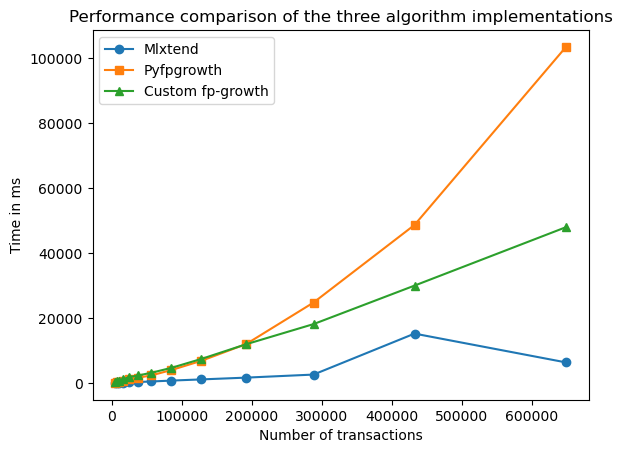

In [19]:
# average the results
np_mlxtend_times = np.array(mlxtend_times)
avg_mlxtend_times = np.mean(np_mlxtend_times, axis=0)

np_pyfpgrowth_times = np.array(pyfpgrowth_times)
avg_pyfpgrowth_times = np.mean(np_pyfpgrowth_times, axis=0)

np_pyfpgrowth_times = np.array(mlxtend_times)
avg_mlxtend_times = np.mean(np_mlxtend_times, axis=0)

np_custom_times = np.array(custom_times)
avg_custom_times = np.mean(np_custom_times, axis=0)

plt.plot(num_transactions[0], avg_mlxtend_times, label='Mlxtend', marker='o')
plt.plot(num_transactions[0], avg_pyfpgrowth_times, label='Pyfpgrowth', marker='s')
plt.plot(num_transactions[0], avg_custom_times, label='Custom fp-growth', marker='^')

plt.xlabel('Number of transactions')
plt.ylabel('Time in ms')
plt.title('Performance comparison of the three algorithm implementations')
plt.legend()

plt.show()